## healthcare_data_manipulation.ipnyb

This program extracts synthetic healthcare data from a database stored on SQL Server and Snowflake. It then manipulates the data in various ways.

Written by Stephen Lew

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyodbc
import seaborn as sns
from dotenv import load_dotenv
from sqlalchemy import create_engine

### Load environment variables from .env file

In [2]:
load_dotenv()

True

### Extract data from database stored on SQL Server

In [3]:
def mssql_engine(server, database):
    engine = create_engine(
        f"mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
    )
    return engine

engine = mssql_engine(server = "localhost\\SQLEXPRESS",
                       database = "SyntheticHealthcareData")

Synthetic healthcare claims data

Source: https://www.kaggle.com/datasets/abuthahir1998/synthetic-healthcare-claims-dataset/data

In [4]:
def read_sql_with_checks(table):
    df = None
    try:
        df = pd.read_sql(f"SELECT * FROM {table}", engine)
        if not df.empty:
            print(f"Data frame df_{table} created.")
        else:
            print("Data frame empty.")
    except FileNotFoundError:
        print("ERROR: File not found.")
        df = pd.DataFrame()
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        df = pd.DataFrame()
    
    return df

df_claim_data = read_sql_with_checks(table = "claim_data")

Data frame df_claim_data created.


In [5]:
df_claim_data

,claim_id,provider_id,patient_id,date_of_service,billed_amount,procedure_code,diagnosis_code,allowed_amount,paid_amount,insurance_type,claim_status,reason_code,followup_required,ar_status,outcome
0,0HO1FSN4AP,0126528997,7936697103,2024-08-07,304.0,99231,A02.1,218.0,203.0,Self-Pay,Paid,Incorrect billing information,Yes,Pending,Partially Paid
1,9U86CI2P5A,6986719948,1547160031,2024-06-21,348.0,99213,T40.905A,216.0,206.0,Medicare,Paid,Pre-existing condition,Yes,Open,Denied
2,1QEU1AIDAU,1355108115,2611585318,2024-07-04,235.0,99213,A00.1,148.0,119.0,Commercial,Under Review,Duplicate claim,No,Denied,Denied
3,WH7XDS8CEO,9991055906,7167948632,2024-05-26,112.0,99215,A18.6,79.0,69.0,Medicare,Denied,Authorization not obtained,No,Partially Paid,Denied
4,M6OJEZ8KGI,7382167012,2140226267,2024-07-16,406.0,99238,A17.9,320.0,259.0,Medicare,Denied,Authorization not obtained,No,On Hold,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0B0TP89BQF,7640195037,6836887959,2024-05-30,307.0,99238,A08.8,231.0,213.0,Commercial,Paid,Service not covered,No,Pending,Partially Paid
996,VVROAPZFFA,3378390045,8592277150,2024-06-23,150.0,99215,A02.8,105.0,99.0,Medicare,Paid,Lack of medical necessity,Yes,Closed,Partially Paid
997,Q9J55DIMLR,2766789913,9757787667,2024-07-07,128.0,99213,V82.2XXS,83.0,75.0,Medicare,Paid,Authorization not obtained,Yes,Partially Paid,Paid
998,531HVTDM18,1335890669,1995402912,2024-05-14,178.0,99215,A08.2,122.0,103.0,Medicaid,Under Review,Patient eligibility issues,Yes,On Hold,Denied


ICD 10 code descriptions

Source: https://www.kaggle.com/datasets/mrhell/icd10cm-codeset-2023

In [6]:
df_icd_codes = read_sql_with_checks(table = "icd_codes")

Data frame df_icd_codes created.


In [7]:
df_icd_codes

,icd_code,description
0,A00.0,"Cholera due to Vibrio cholerae 01, biovar chol..."
1,A00.1,"Cholera due to Vibrio cholerae 01, biovar eltor"
2,A00.9,"Cholera, unspecified"
3,A01.00,"Typhoid fever, unspecified"
4,A01.01,Typhoid meningitis
...,...,...
73634,Z99.81,Dependence on supplemental oxygen
73635,Z99.89,Dependence on other enabling machines and devices
73636,U07.0,Vaping-related disorder
73637,U07.1,COVID-19


### Extract data from database stored on Snowflake

In [8]:
def snowflake_engine(uid, pwd, account, database, schema):
    engine = create_engine(
        f"snowflake://{uid}:{pwd}@{account}/{database}/{schema}?warehouse=COMPUTE_WH&role=ACCOUNTADMIN"
    )

    return engine

engine = snowflake_engine(uid = os.getenv("SNOWFLAKE_USER"),
                           pwd = os.getenv("SNOWFLAKE_PASSWORD"),
                           account = os.getenv("SNOWFLAKE_ACCOUNT"),
                           database = "SYNTHETICHEALTHCAREDATA",
                           schema = "PUBLIC")

In [9]:
df_claim_data = read_sql_with_checks(table = "claim_data")

Data frame df_claim_data created.


In [10]:
df_claim_data

,claim_id,provider_id,patient_id,date_of_service,billed_amount,procedure_code,diagnosis_code,allowed_amount,paid_amount,insurance_type,claim_status,reason_code,followup_required,ar_status,outcome
0,0HO1FSN4AP,0126528997,7936697103,2024-08-07,304.0,99231,A02.1,218.0,203.0,Self-Pay,Paid,Incorrect billing information,Yes,Pending,Partially Paid
1,9U86CI2P5A,6986719948,1547160031,2024-06-21,348.0,99213,T40.905A,216.0,206.0,Medicare,Paid,Pre-existing condition,Yes,Open,Denied
2,1QEU1AIDAU,1355108115,2611585318,2024-07-04,235.0,99213,A00.1,148.0,119.0,Commercial,Under Review,Duplicate claim,No,Denied,Denied
3,WH7XDS8CEO,9991055906,7167948632,2024-05-26,112.0,99215,A18.6,79.0,69.0,Medicare,Denied,Authorization not obtained,No,Partially Paid,Denied
4,M6OJEZ8KGI,7382167012,2140226267,2024-07-16,406.0,99238,A17.9,320.0,259.0,Medicare,Denied,Authorization not obtained,No,On Hold,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0B0TP89BQF,7640195037,6836887959,2024-05-30,307.0,99238,A08.8,231.0,213.0,Commercial,Paid,Service not covered,No,Pending,Partially Paid
996,VVROAPZFFA,3378390045,8592277150,2024-06-23,150.0,99215,A02.8,105.0,99.0,Medicare,Paid,Lack of medical necessity,Yes,Closed,Partially Paid
997,Q9J55DIMLR,2766789913,9757787667,2024-07-07,128.0,99213,V82.2XXS,83.0,75.0,Medicare,Paid,Authorization not obtained,Yes,Partially Paid,Paid
998,531HVTDM18,1335890669,1995402912,2024-05-14,178.0,99215,A08.2,122.0,103.0,Medicaid,Under Review,Patient eligibility issues,Yes,On Hold,Denied


In [11]:
df_icd_codes = read_sql_with_checks(table = "icd_codes")

Data frame df_icd_codes created.


In [12]:
df_icd_codes

,icd_code,description
0,A00.0,"Cholera due to Vibrio cholerae 01, biovar chol..."
1,A00.1,"Cholera due to Vibrio cholerae 01, biovar eltor"
2,A00.9,"Cholera, unspecified"
3,A01.00,"Typhoid fever, unspecified"
4,A01.01,Typhoid meningitis
...,...,...
73634,Z99.81,Dependence on supplemental oxygen
73635,Z99.89,Dependence on other enabling machines and devices
73636,U07.0,Vaping-related disorder
73637,U07.1,COVID-19


### Change data format

Convert date variable from text values to date values

In [13]:
df_claim_data["date_of_service"] = pd.to_datetime(df_claim_data["date_of_service"], format = "%Y-%m-%d", errors = "coerce")

### Validate data

Dataset information

In [14]:
df_claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           1000 non-null   object        
 1   provider_id        1000 non-null   object        
 2   patient_id         1000 non-null   object        
 3   date_of_service    1000 non-null   datetime64[ns]
 4   billed_amount      1000 non-null   float64       
 5   procedure_code     1000 non-null   object        
 6   diagnosis_code     1000 non-null   object        
 7   allowed_amount     1000 non-null   float64       
 8   paid_amount        1000 non-null   float64       
 9   insurance_type     1000 non-null   object        
 10  claim_status       1000 non-null   object        
 11  reason_code        1000 non-null   object        
 12  followup_required  1000 non-null   object        
 13  ar_status          1000 non-null   object        
 14  outcome  

Summary statistics of continuous variables

In [15]:
df_claim_data[["date_of_service", "billed_amount", "allowed_amount", "paid_amount"]].describe()

,date_of_service,billed_amount,allowed_amount,paid_amount
count,1000,1000.00000,1000.000000,1000.000000
mean,2024-07-09 22:56:38.400000,297.19100,223.112000,200.754000
min,2024-05-01 00:00:00,100.00000,64.000000,53.000000
25%,2024-06-06 00:00:00,197.00000,147.750000,133.000000
50%,2024-07-10 00:00:00,297.00000,225.000000,200.000000
75%,2024-08-15 00:00:00,395.00000,289.000000,262.000000
max,2024-09-20 00:00:00,500.00000,442.000000,423.000000
std,NaN,116.36365,90.784731,83.353688


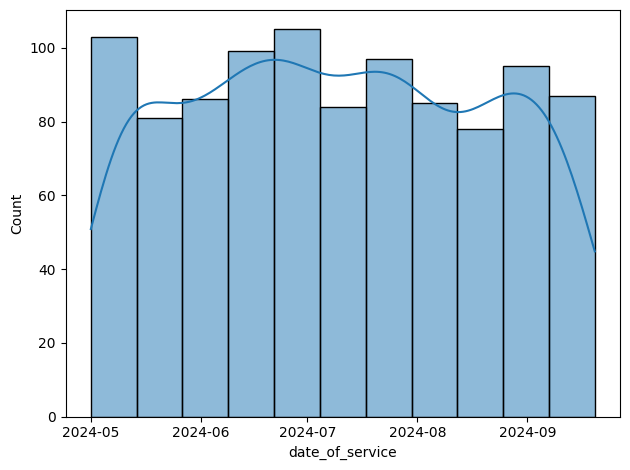

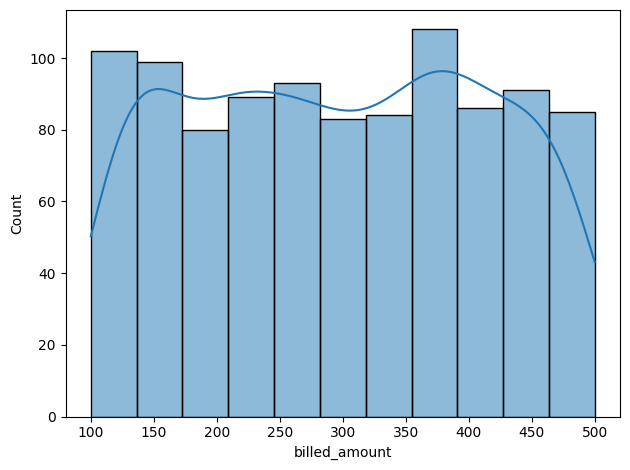

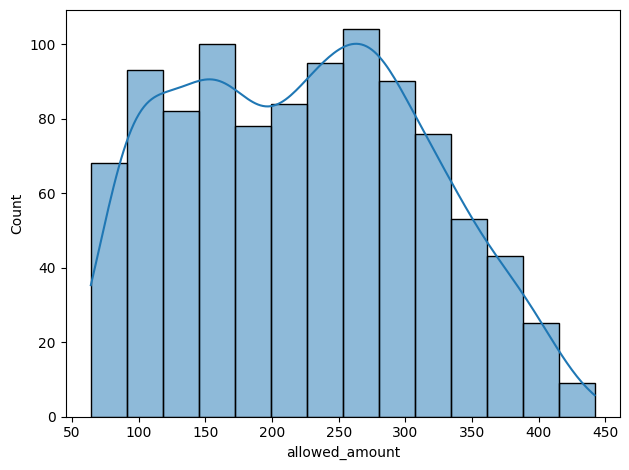

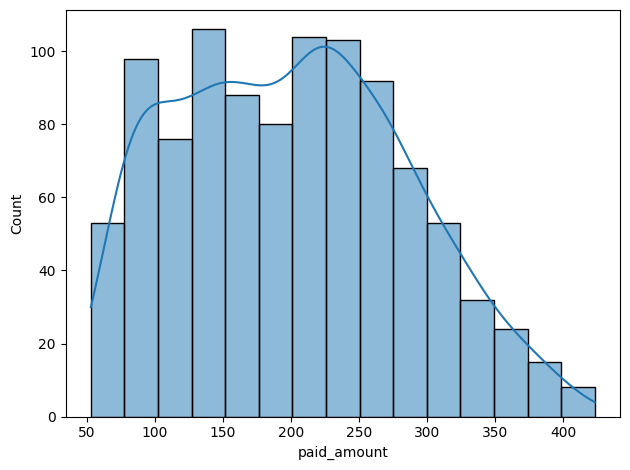

In [16]:
histplot_list = ["date_of_service", "billed_amount", "allowed_amount", "paid_amount"]
for i in histplot_list:
    sns.histplot(df_claim_data[f"{i}"], kde=True)
    plt.tight_layout()
    plt.show()

Frequency distributions of categorical variables

insurance_type
Medicaid      259
Commercial    259
Self-Pay      249
Medicare      233
Name: count, dtype: int64


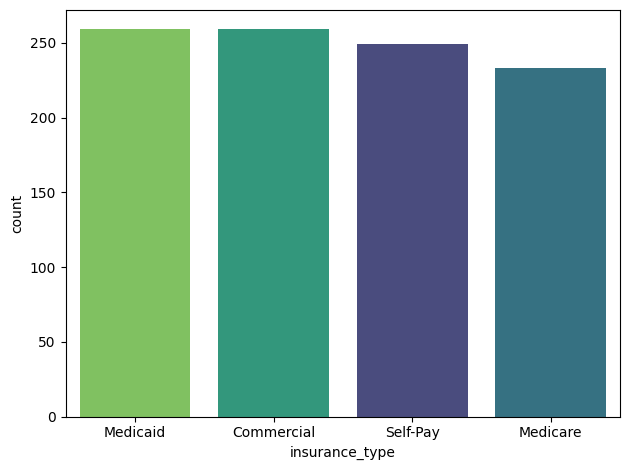

claim_status
Under Review    338
Paid            334
Denied          328
Name: count, dtype: int64


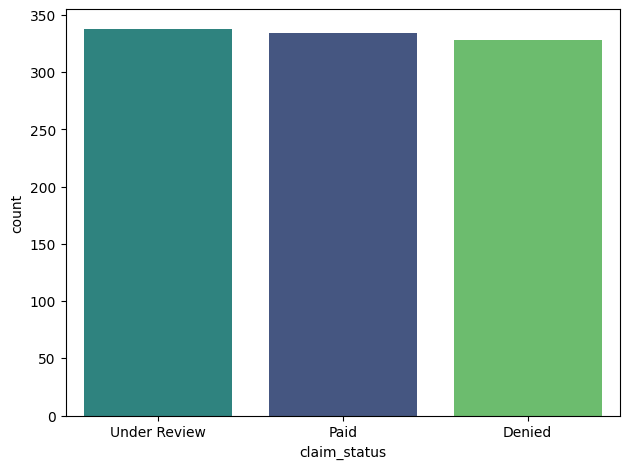

followup_required
Yes    522
No     478
Name: count, dtype: int64


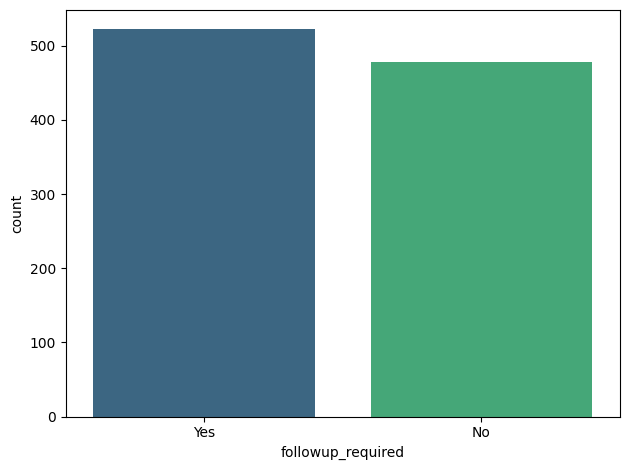

ar_status
Partially Paid    184
On Hold           177
Pending           162
Open              160
Closed            160
Denied            157
Name: count, dtype: int64


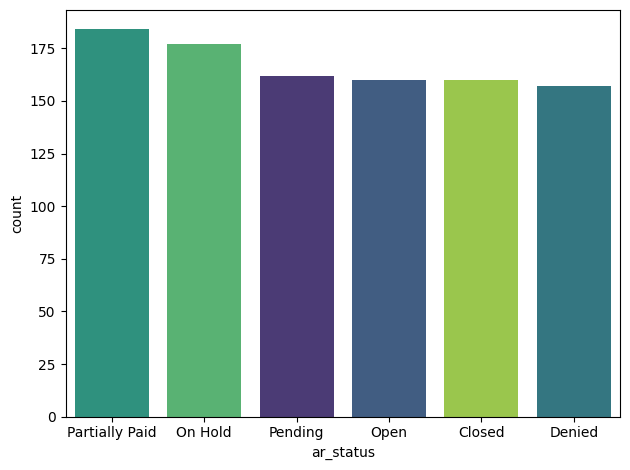

outcome
Paid              357
Denied            331
Partially Paid    312
Name: count, dtype: int64


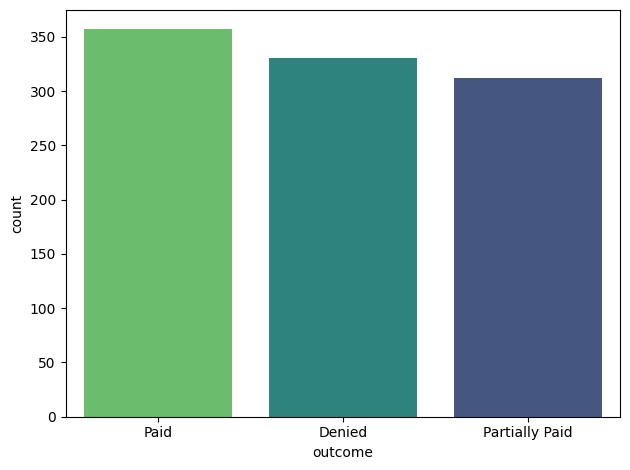

In [17]:
countplot_list = ["insurance_type", "claim_status", "followup_required", "ar_status", "outcome"]
for i in countplot_list:
    print(df_claim_data[f"{i}"].value_counts())
    sns.countplot(df_claim_data, x = f"{i}", palette = "viridis", hue = f"{i}", legend = False, order = df_claim_data[f"{i}"].value_counts().index)
    plt.xlabel(f"{i}")
    plt.tight_layout()
    plt.show()

reason_code
Authorization not obtained       154
Incorrect billing information    142
Missing documentation            126
Patient eligibility issues       126
Pre-existing condition           121
Duplicate claim                  113
Service not covered              111
Lack of medical necessity        107
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='reason_code'>

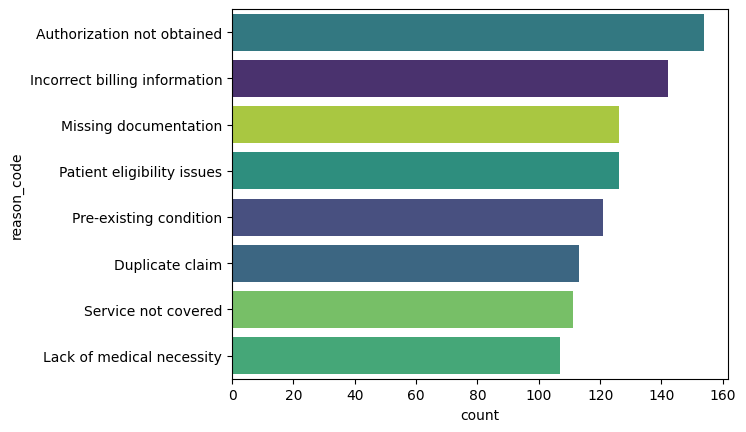

In [18]:
print(df_claim_data["reason_code"].value_counts())
sns.countplot(df_claim_data, y = "reason_code", palette = "viridis", hue = "reason_code", legend = False, order =df_claim_data["reason_code"].value_counts().index)

### Join tables and rename field

Bring in descriptions of ICD-10 codes into the claims data.

Rename the new field from "description" to "diagnosis description".

In [19]:
df_claim_data = (df_claim_data.merge(df_icd_codes, left_on = "diagnosis_code", right_on = "icd_code", how = "left")
                 .rename(columns = {"description": "diagnosis_description"})
                 .drop("icd_code", axis = 1))
df_claim_data

,claim_id,provider_id,patient_id,date_of_service,billed_amount,procedure_code,diagnosis_code,allowed_amount,paid_amount,insurance_type,claim_status,reason_code,followup_required,ar_status,outcome,diagnosis_description
0,0HO1FSN4AP,0126528997,7936697103,2024-08-07,304.0,99231,A02.1,218.0,203.0,Self-Pay,Paid,Incorrect billing information,Yes,Pending,Partially Paid,Salmonella sepsis
1,9U86CI2P5A,6986719948,1547160031,2024-06-21,348.0,99213,T40.905A,216.0,206.0,Medicare,Paid,Pre-existing condition,Yes,Open,Denied,Adverse effect of unspecified psychodysleptics...
2,1QEU1AIDAU,1355108115,2611585318,2024-07-04,235.0,99213,A00.1,148.0,119.0,Commercial,Under Review,Duplicate claim,No,Denied,Denied,"Cholera due to Vibrio cholerae 01, biovar eltor"
3,WH7XDS8CEO,9991055906,7167948632,2024-05-26,112.0,99215,A18.6,79.0,69.0,Medicare,Denied,Authorization not obtained,No,Partially Paid,Denied,Tuberculosis of (inner) (middle) ear
4,M6OJEZ8KGI,7382167012,2140226267,2024-07-16,406.0,99238,A17.9,320.0,259.0,Medicare,Denied,Authorization not obtained,No,On Hold,Denied,"Tuberculosis of nervous system, unspecified"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0B0TP89BQF,7640195037,6836887959,2024-05-30,307.0,99238,A08.8,231.0,213.0,Commercial,Paid,Service not covered,No,Pending,Partially Paid,Other specified intestinal infections
996,VVROAPZFFA,3378390045,8592277150,2024-06-23,150.0,99215,A02.8,105.0,99.0,Medicare,Paid,Lack of medical necessity,Yes,Closed,Partially Paid,Other specified salmonella infections
997,Q9J55DIMLR,2766789913,9757787667,2024-07-07,128.0,99213,V82.2XXS,83.0,75.0,Medicare,Paid,Authorization not obtained,Yes,Partially Paid,Paid,Occupant of streetcar injured in collision wit...
998,531HVTDM18,1335890669,1995402912,2024-05-14,178.0,99215,A08.2,122.0,103.0,Medicaid,Under Review,Patient eligibility issues,Yes,On Hold,Denied,Adenoviral enteritis


### Create variable and summarise data

Create a new dataframe that has, for each insurance type, the rate at which claims are denied.

In [20]:
df_claim_data["denial_rate"] = np.where(df_claim_data["claim_status"] == "Denied", 100, 
                                        np.where(df_claim_data["claim_status"] == "Paid", 0, None))
df_denial_rate = (df_claim_data.groupby("insurance_type")["denial_rate"].mean()
                  .reset_index())
df_denial_rate


,insurance_type,denial_rate
0,Commercial,51.445087
1,Medicaid,45.180723
2,Medicare,53.164557
3,Self-Pay,48.484848


### Filter data

Subset the data to only records with a diagnosis code of A05.4 (Foodborne Bacillus cereus intoxication).

In [21]:
df_filter = df_claim_data.query("diagnosis_code == 'A05.4'")
df_filter

,claim_id,provider_id,patient_id,date_of_service,billed_amount,procedure_code,diagnosis_code,allowed_amount,paid_amount,insurance_type,claim_status,reason_code,followup_required,ar_status,outcome,diagnosis_description,denial_rate
8,TLU7MTJ63J,6675789567,1861061750,2024-07-16,126.0,99238,A05.4,109.0,108.0,Medicare,Denied,Authorization not obtained,No,Closed,Partially Paid,Foodborne Bacillus cereus intoxication,100
59,Y4I4JQPVK4,8925429111,9342177346,2024-07-11,267.0,99215,A05.4,214.0,171.0,Self-Pay,Under Review,Authorization not obtained,Yes,Open,Paid,Foodborne Bacillus cereus intoxication,None
213,TD0EG8I93R,6744823555,6194960851,2024-08-17,349.0,99231,A05.4,273.0,267.0,Commercial,Paid,Service not covered,No,Partially Paid,Partially Paid,Foodborne Bacillus cereus intoxication,0
253,RS1YY0WY24,5431725002,9176601831,2024-05-28,111.0,99238,A05.4,81.0,76.0,Self-Pay,Paid,Lack of medical necessity,Yes,Closed,Denied,Foodborne Bacillus cereus intoxication,0
263,BADGAN63O1,0456145390,9008471630,2024-07-25,172.0,99222,A05.4,147.0,127.0,Medicare,Under Review,Incorrect billing information,Yes,Open,Paid,Foodborne Bacillus cereus intoxication,None
337,7E8Y0EUKNJ,9406678657,8744259500,2024-06-11,325.0,99233,A05.4,276.0,262.0,Self-Pay,Denied,Incorrect billing information,No,Open,Denied,Foodborne Bacillus cereus intoxication,100
340,FSKS53L7J4,6759559384,7560566891,2024-06-16,483.0,99238,A05.4,426.0,368.0,Medicaid,Denied,Service not covered,Yes,Closed,Paid,Foodborne Bacillus cereus intoxication,100
417,EYOS09JPEW,3050607331,6787726636,2024-09-12,193.0,99215,A05.4,148.0,146.0,Medicaid,Denied,Missing documentation,No,Pending,Partially Paid,Foodborne Bacillus cereus intoxication,100
475,DX78LUNF87,2316904587,9259142711,2024-06-30,492.0,99238,A05.4,379.0,352.0,Self-Pay,Under Review,Lack of medical necessity,No,Closed,Paid,Foodborne Bacillus cereus intoxication,None
594,129JSAM402,3408573075,5948517708,2024-08-08,405.0,99232,A05.4,255.0,218.0,Medicare,Paid,Service not covered,Yes,Denied,Partially Paid,Foodborne Bacillus cereus intoxication,0


### Sort data

Sort data by date of service then claim ID.

In [22]:
(df_claim_data.sort_values(["date_of_service", "claim_id"]))

,claim_id,provider_id,patient_id,date_of_service,billed_amount,procedure_code,diagnosis_code,allowed_amount,paid_amount,insurance_type,claim_status,reason_code,followup_required,ar_status,outcome,diagnosis_description,denial_rate
235,4AECRPPSTL,6034872297,1183596686,2024-05-01,214.0,99213,M72.8,179.0,178.0,Commercial,Under Review,Duplicate claim,No,Partially Paid,Partially Paid,Other fibroblastic disorders,None
403,8H6FAKD1OH,1109442085,5127757508,2024-05-01,244.0,99238,A04.8,168.0,150.0,Medicaid,Under Review,Duplicate claim,Yes,Pending,Paid,Other specified bacterial intestinal infections,None
267,AFCVL9N05Z,0369668919,3458366761,2024-05-01,108.0,99222,A05.0,66.0,58.0,Medicaid,Paid,Missing documentation,Yes,Closed,Partially Paid,Foodborne staphylococcal intoxication,0
919,WR6QACIBSK,6636473801,6871324728,2024-05-01,252.0,99213,M93.259,222.0,183.0,Commercial,Paid,Duplicate claim,Yes,Denied,Partially Paid,"Osteochondritis dissecans, unspecified hip",0
174,0APP6HH8P5,5577749071,8116288647,2024-05-02,224.0,99221,A05.3,158.0,133.0,Commercial,Denied,Lack of medical necessity,Yes,Open,Paid,Foodborne Vibrio parahaemolyticus intoxication,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,9DIU004YOL,7809721760,2819227707,2024-09-20,372.0,99214,V06.19XD,273.0,251.0,Commercial,Under Review,Missing documentation,Yes,Partially Paid,Denied,Pedestrian with other conveyance injured in co...,None
32,LDWX5I35Y9,7576667741,4812043647,2024-09-20,142.0,99223,M1A.39X0,110.0,105.0,Medicare,Paid,Missing documentation,No,Closed,Partially Paid,"Chronic gout due to renal impairment, multiple...",0
962,NHZOO9HJH4,5428644479,7625464006,2024-09-20,189.0,99214,S62.212A,164.0,149.0,Medicare,Under Review,Service not covered,No,Denied,Paid,"Bennett's fracture, left hand, initial encount...",None
85,W8SPOELELC,9141687046,1594441000,2024-09-20,390.0,99214,V11.4XXD,351.0,335.0,Commercial,Denied,Pre-existing condition,Yes,Open,Paid,Pedal cycle driver injured in collision with o...,100


### Keep select fields

Keep only the fields for claim ID, procedure code, and diagnosis code.

In [23]:
df_select = df_claim_data[["claim_id", "procedure_code", "diagnosis_code"]]
df_select

,claim_id,procedure_code,diagnosis_code
0,0HO1FSN4AP,99231,A02.1
1,9U86CI2P5A,99213,T40.905A
2,1QEU1AIDAU,99213,A00.1
3,WH7XDS8CEO,99215,A18.6
4,M6OJEZ8KGI,99238,A17.9
...,...,...,...
995,0B0TP89BQF,99238,A08.8
996,VVROAPZFFA,99215,A02.8
997,Q9J55DIMLR,99213,V82.2XXS
998,531HVTDM18,99215,A08.2


### Perform the same operation on multiple columns

For each field insurance_type, claim_status, reason_code, followup_required, ar_status, and outcome, create a new field with the value in uppercase.

In [24]:
list_chr_vars = [
    ("insurance_type", "insurance_type_upcase"),
    ("claim_status", "claim_status_upcase"),
    ("reason_code", "reason_code_upcase"),
    ("followup_required", "followup_required_upcase"),
    ("ar_status", "ar_status_upcase"),
    ("outcome", "outcome_upcase")
]
for mcase, ucase in list_chr_vars:
    df_claim_data[f"{ucase}"] = df_claim_data[f"{mcase}"].str.upper()
df_claim_data

,claim_id,provider_id,patient_id,date_of_service,billed_amount,procedure_code,diagnosis_code,allowed_amount,paid_amount,insurance_type,...,ar_status,outcome,diagnosis_description,denial_rate,insurance_type_upcase,claim_status_upcase,reason_code_upcase,followup_required_upcase,ar_status_upcase,outcome_upcase
0,0HO1FSN4AP,0126528997,7936697103,2024-08-07,304.0,99231,A02.1,218.0,203.0,Self-Pay,...,Pending,Partially Paid,Salmonella sepsis,0,SELF-PAY,PAID,INCORRECT BILLING INFORMATION,YES,PENDING,PARTIALLY PAID
1,9U86CI2P5A,6986719948,1547160031,2024-06-21,348.0,99213,T40.905A,216.0,206.0,Medicare,...,Open,Denied,Adverse effect of unspecified psychodysleptics...,0,MEDICARE,PAID,PRE-EXISTING CONDITION,YES,OPEN,DENIED
2,1QEU1AIDAU,1355108115,2611585318,2024-07-04,235.0,99213,A00.1,148.0,119.0,Commercial,...,Denied,Denied,"Cholera due to Vibrio cholerae 01, biovar eltor",None,COMMERCIAL,UNDER REVIEW,DUPLICATE CLAIM,NO,DENIED,DENIED
3,WH7XDS8CEO,9991055906,7167948632,2024-05-26,112.0,99215,A18.6,79.0,69.0,Medicare,...,Partially Paid,Denied,Tuberculosis of (inner) (middle) ear,100,MEDICARE,DENIED,AUTHORIZATION NOT OBTAINED,NO,PARTIALLY PAID,DENIED
4,M6OJEZ8KGI,7382167012,2140226267,2024-07-16,406.0,99238,A17.9,320.0,259.0,Medicare,...,On Hold,Denied,"Tuberculosis of nervous system, unspecified",100,MEDICARE,DENIED,AUTHORIZATION NOT OBTAINED,NO,ON HOLD,DENIED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0B0TP89BQF,7640195037,6836887959,2024-05-30,307.0,99238,A08.8,231.0,213.0,Commercial,...,Pending,Partially Paid,Other specified intestinal infections,0,COMMERCIAL,PAID,SERVICE NOT COVERED,NO,PENDING,PARTIALLY PAID
996,VVROAPZFFA,3378390045,8592277150,2024-06-23,150.0,99215,A02.8,105.0,99.0,Medicare,...,Closed,Partially Paid,Other specified salmonella infections,0,MEDICARE,PAID,LACK OF MEDICAL NECESSITY,YES,CLOSED,PARTIALLY PAID
997,Q9J55DIMLR,2766789913,9757787667,2024-07-07,128.0,99213,V82.2XXS,83.0,75.0,Medicare,...,Partially Paid,Paid,Occupant of streetcar injured in collision wit...,0,MEDICARE,PAID,AUTHORIZATION NOT OBTAINED,YES,PARTIALLY PAID,PAID
998,531HVTDM18,1335890669,1995402912,2024-05-14,178.0,99215,A08.2,122.0,103.0,Medicaid,...,On Hold,Denied,Adenoviral enteritis,None,MEDICAID,UNDER REVIEW,PATIENT ELIGIBILITY ISSUES,YES,ON HOLD,DENIED


### Export analysis dataframe to a CSV file

In [25]:
df_claim_data.to_csv("Output/claim_data.csv", index = False)